# PRÀCTICA 1 - REGRESSIÓ

1597487 | Manuel Arnau Fernández

1600123 | Alba Fernández Coronado

1605547 | Marina Palomar González

## 1. Descripció de les dades

In [1]:
# Carregant les llibreries necessàries
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import collections as col
import scipy.stats as stats
import random as rand
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
#from sklearn.datas import make_regression
import scipy.stats
from sklearn.metrics import r2_score

# Per importar data


In [2]:
# Carregant el conjunt de dades
dataset = pd.read_csv('insurance.csv')
print(f'Mida de les dades: {dataset.shape}')
dataset.head()

Mida de les dades: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Entenent els tipus de variables de cada atribut
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# Convertint cadenes a dades numèriques per poder més endavant poder treballar amb elles i fem one-hot encoding amb regió
data = pd.concat([dataset, pd.get_dummies(dataset.region, prefix='region')], axis=1)
data = pd.concat([data, pd.get_dummies(dataset.smoker, drop_first=True, prefix='smoker')], axis=1)
data = pd.concat([data, pd.get_dummies(dataset.sex, drop_first=True, prefix='is')], axis=1)
data = data.drop(['smoker'], axis=1)
data = data.drop(['sex'], axis=1)
data.head()

,age,bmi,children,region,charges,region_northeast,region_northwest,region_southeast,region_southwest,smoker_yes,is_male
0,19,27.900,0,southwest,16884.92400,0,0,0,1,1,0
1,18,33.770,1,southeast,1725.55230,0,0,1,0,0,1
2,28,33.000,3,southeast,4449.46200,0,0,1,0,0,1
3,33,22.705,0,northwest,21984.47061,0,1,0,0,0,1
4,32,28.880,0,northwest,3866.85520,0,1,0,0,0,1


In [5]:
data.describe()

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,smoker_yes,is_male
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.242152,0.242900,0.272048,0.242900,0.204783,0.505232
std,14.049960,6.098187,1.205493,12110.011237,0.428546,0.428995,0.445181,0.428995,0.403694,0.500160
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,51.000000,34.693750,2.000000,16639.912515,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Un cop analitzats els atributs, es decideix quin atribut correspon a la varibale resposta. En aquest cas, s'aproximarà el valor de la variable *charges* mitjançant la combinació lineal de les altres sis característiques.

In [6]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# Comencem partint el data en variable resposta i atributs
Y = dataset['charges']
X = dataset.drop('charges', axis = 1)

### ANÀLISI DELS ATRIBUTS

Southwest: 325, Southeast: 364, Northeast: 324, Northwest: 325


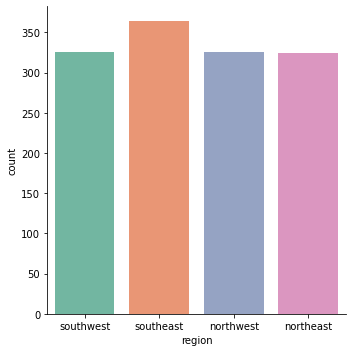

In [8]:
# Estudi de region
sns.catplot(x = "region", data = data, kind = "count", palette='Set2')
count = col.Counter(data['region'])
sw = count['southwest']
se = count['southeast']
ne = count['northeast']
nw = count['northwest']
print(f'Southwest: {sw}, Southeast: {se}, Northeast: {ne}, Northwest: {nw}')

Zero fills: 574, Un fill: 324, Dos fills: 240, Tres fills: 157, Quatre fills: 25, Cinc fills: 18


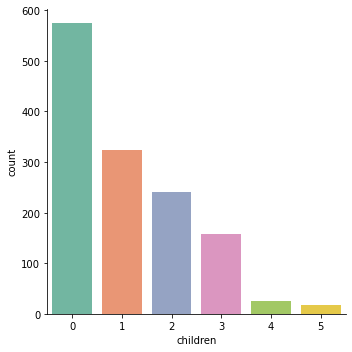

In [9]:
# Estudi de children
sns.catplot(x = "children", data = data, kind = "count", palette='Set2')
count = col.Counter(data['children'])
z = count[0]
u = count[1]
d = count[2]
t = count[3]
q = count[4]
c = count[5]
print(f'Zero fills: {z}, Un fill: {u}, Dos fills: {d}, Tres fills: {t}, Quatre fills: {q}, Cinc fills: {c}')

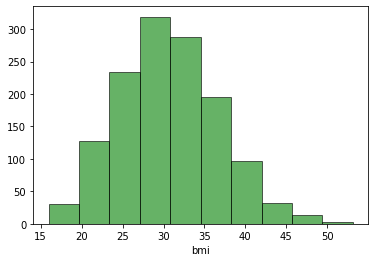

<AxesSubplot:xlabel='bmi', ylabel='Density'>

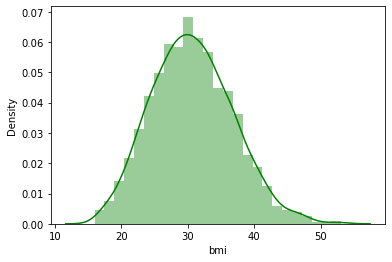

In [10]:
# Estudi de BMI
plt.hist(data['bmi'], color= 'green', edgecolor = 'black', alpha = 0.6)
plt.xlabel('bmi')
plt.show()

sns.distplot(data['bmi'], color= 'green')

Nombre total outliers en la distribució BMI: 9.


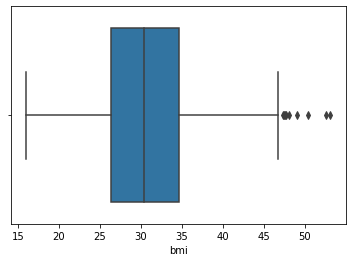

In [11]:
sns.boxplot(data['bmi'])
Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)
IQR = Q3 - Q1
total_outlier_num = ((data['bmi'] < (Q1 - 1.5 * IQR)) | (data['bmi'] > (Q3 + 1.5 * IQR))).sum()
print(f'Nombre total outliers en la distribució BMI: {total_outlier_num}.')

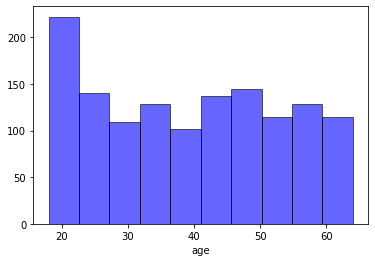

<AxesSubplot:xlabel='age', ylabel='Density'>

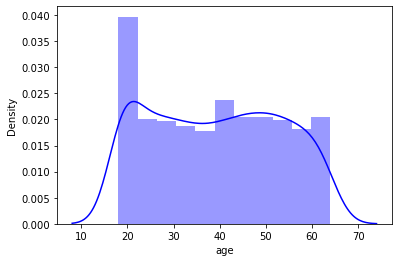

In [12]:
# Estudi de age
plt.hist(data['age'], color= 'blue', edgecolor = 'black', alpha = 0.6)
plt.xlabel('age')
plt.show()

sns.distplot(data['age'], color= 'blue')

Nombre total outliers en la distribució AGE: 0.


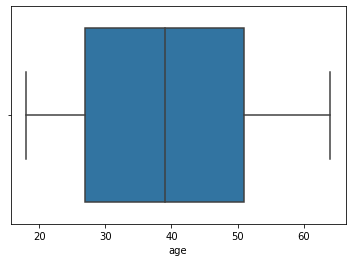

In [13]:
sns.boxplot(data['age'])
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
total_outlier_num = ((data['age'] < (Q1 - 1.5 * IQR)) | (data['age'] > (Q3 + 1.5 * IQR))).sum()
print(f'Nombre total outliers en la distribució AGE: {total_outlier_num}.')

Homes: 676, Dones: 662


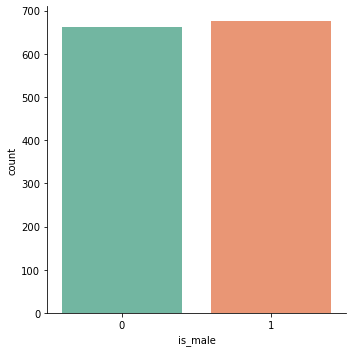

In [14]:
# Estudi de sex
sns.catplot(x = "is_male", data = data, kind = "count", palette='Set2')
count = col.Counter(data['is_male'])
female = count[0]
male = count[1]
print(f'Homes: {male}, Dones: {female}')

No fumadors: 1064, Fumadors: 274


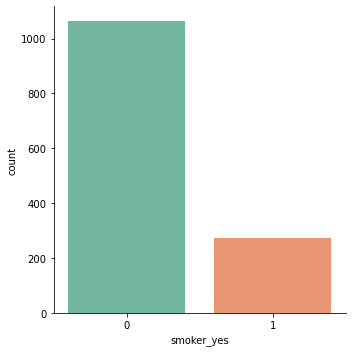

In [15]:
# Estudi de smoke
sns.catplot(x = "smoker_yes", data = data, kind = "count", palette='Set2')
count = col.Counter(data['smoker_yes'])
no_s = count[0]
s = count[1]
print(f'No fumadors: {no_s}, Fumadors: {s}')

### INFORMACIÓ DE LA VARIABLE RESPOSTA

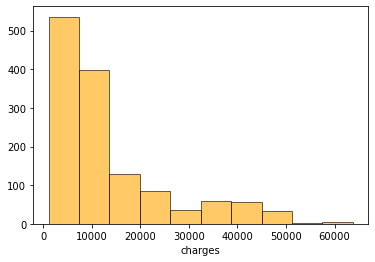

<AxesSubplot:xlabel='charges', ylabel='Density'>

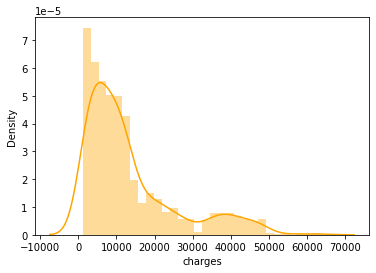

In [16]:
#DISTRIBUCIÓ DE LA VARIABLE OBJECTIU: EXPONENCIAL
plt.hist(data['charges'], color= 'orange', edgecolor = 'black', alpha = 0.6)
plt.xlabel('charges')
plt.show()
sns.distplot(data['charges'], color= 'orange')

Veiem que la funció charges segueix una distribució exponencial, per tal de facilitzarnos l'estudi, fem un canvi per que aquesta segueixi una distribució gausiana

In [17]:
data['charges_log'] = np.log(data['charges'])
data['charges_log'] = (data['charges_log'] - np.mean(data['charges_log']))/np.var(data['charges_log'])
data.head()

,age,bmi,children,region,charges,region_northeast,region_northwest,region_southeast,region_southwest,smoker_yes,is_male,charges_log
0,19,27.900,0,southwest,16884.92400,0,0,0,1,1,0,0.752183
1,18,33.770,1,southeast,1725.55230,0,0,1,0,0,1,-1.947402
2,28,33.000,3,southeast,4449.46200,0,0,1,0,0,1,-0.826277
3,33,22.705,0,northwest,21984.47061,0,1,0,0,0,1,1.064546
4,32,28.880,0,northwest,3866.85520,0,1,0,0,0,1,-0.992382


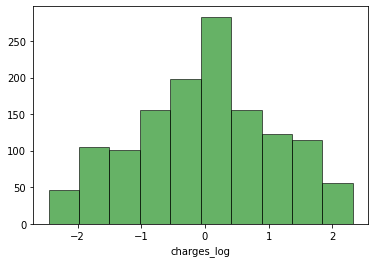

<AxesSubplot:xlabel='charges_log', ylabel='Density'>

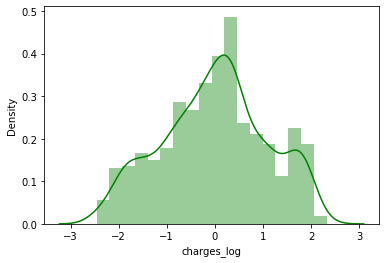

In [18]:
#DISTRIBUCIÓ DE LA VARIABLE OBJECTIU 2: GAUSSIANA
plt.hist(data['charges_log'], color= 'green', edgecolor = 'black', alpha = 0.6)
plt.xlabel('charges_log')
plt.show()
sns.distplot(data['charges_log'], color= 'green')

Nombre total outliers en la distribució CHARGES: 139.


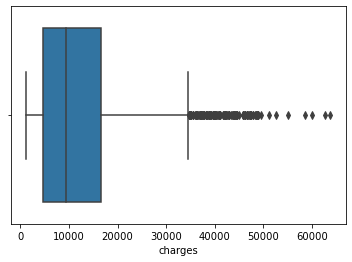

In [19]:
sns.boxplot(data['charges'])
Q1 = data['charges'].quantile(0.25)
Q3 = data['charges'].quantile(0.75)
IQR = Q3 - Q1
total_outlier_num = ((data['charges'] < (Q1 - 1.5 * IQR)) | (data['charges'] > (Q3 + 1.5 * IQR))).sum()
print(f'Nombre total outliers en la distribució CHARGES: {total_outlier_num}.')

### ANÀLISI DELS ATRIBUTS RESPECTE LA VARIABLE RESPOSTA

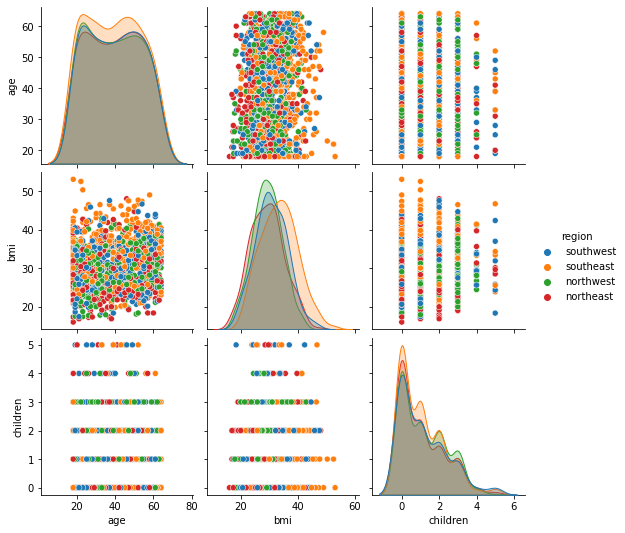

In [20]:
# Tracem relacions per parelles d'atributs no binaris
sns.pairplot(X, hue = 'region') #quin hue es millor (region, sex, smoker)

Conclusió de pairplot:

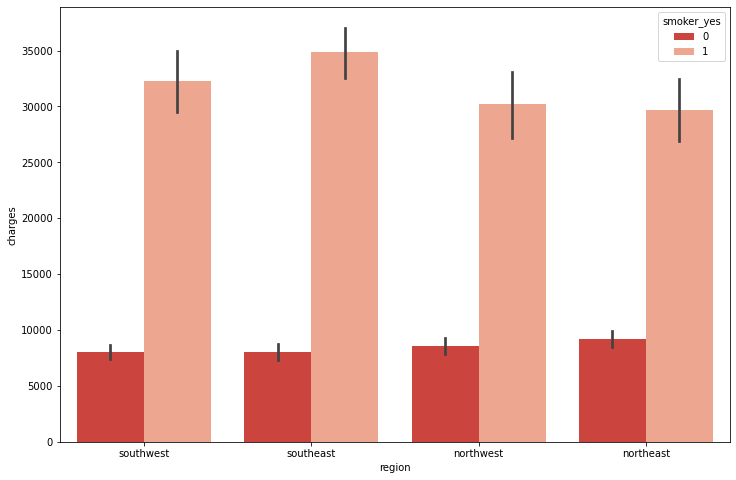

In [21]:
# Comparació fumadors i preus segons regió
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges', hue='smoker_yes', data=data, palette='Reds_r')

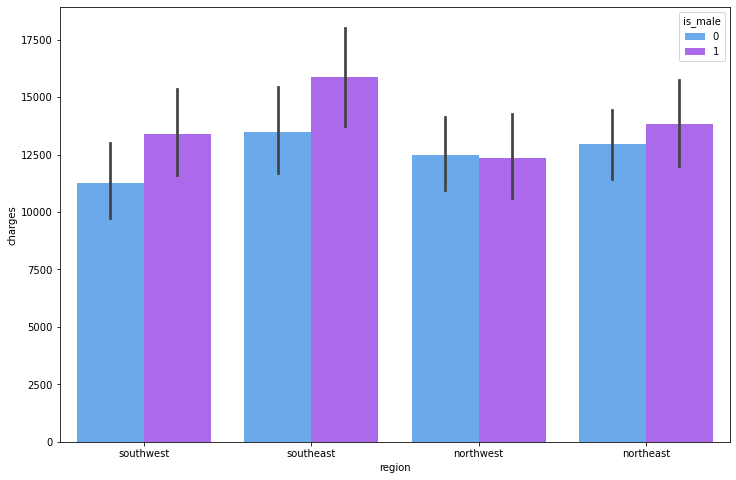

In [22]:
# Comparació genere i preus segons regió
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='is_male', data=data, palette='cool')

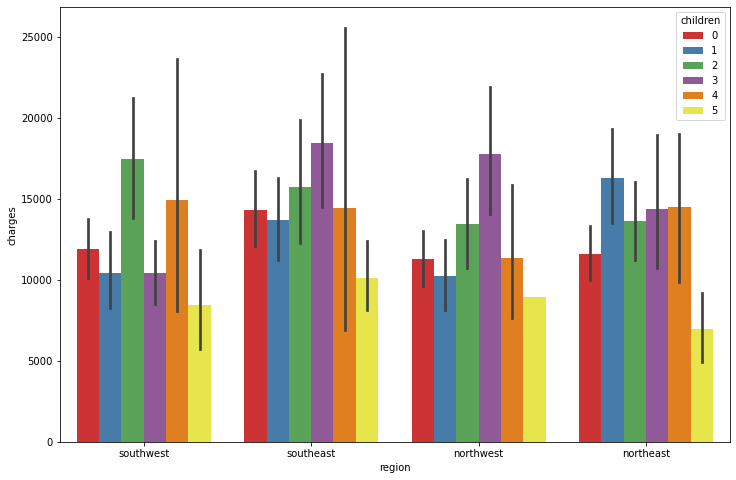

In [23]:
# Comparació genere i preus segons regió
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=data, palette='Set1')

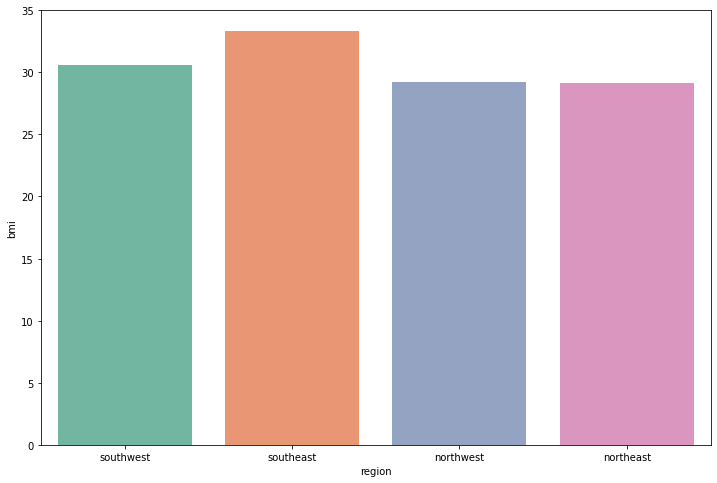

In [24]:
# Comparació bmi segons regió
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='bmi', data=data, ci = None, palette='Set2')

Conclusió de barplots:

### ANÀLISI P-VALOR (CAMBIAR)

 * El BMI dels homes difereix molt del de les dones?

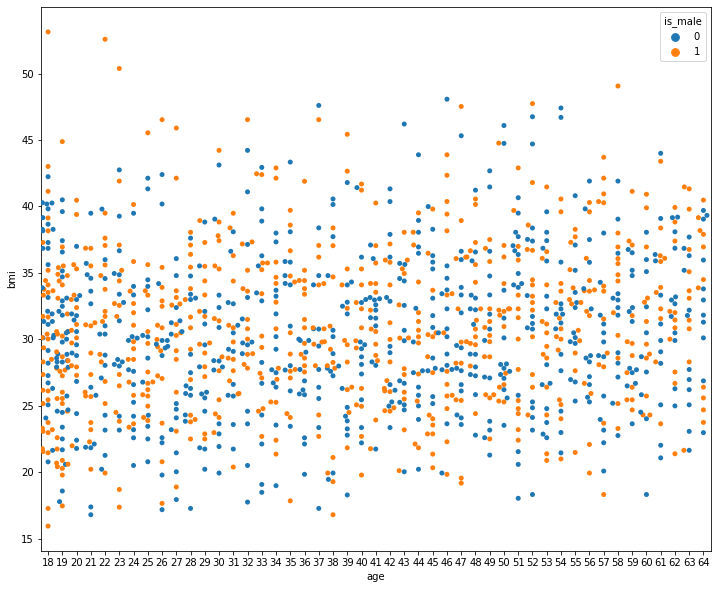

In [25]:
# Comparació del 'sex' respecte 'bmi' i 'age'
plt.figure(figsize=(12,10))
sns.swarmplot(y='bmi',x='age',hue='is_male',data=data)
plt.show()

In [26]:
# S'aplica el T-test per analitzar com afecta el genere al bmi
H0 = "el BMI dels homes no difereix gaire del de les dones" 
H1 = "el BMI dels homes difereix del de les dones" 

x = np.array(data[data.is_male == 1].bmi)  
y = np.array(data[data.is_male == 0].bmi) 

# Realiztant un T-test independent
t, p_valor  = stats.ttest_ind(x,y, axis = 0)  

if(p_valor<0.05):
    print(f'{p_valor} -> Es rebutja la hipòtesi nul·la, per tant {H1}')
else:
    print(f'{p_valor} -> No es rebutja la hipòtesi nul·la, per tant {H0}') 

0.08997637178984932 -> No es rebutja la hipòtesi nul·la, per tant el BMI dels homes no difereix gaire del de les dones


* Dones amb més fills paguen més que dones amb menys fills?

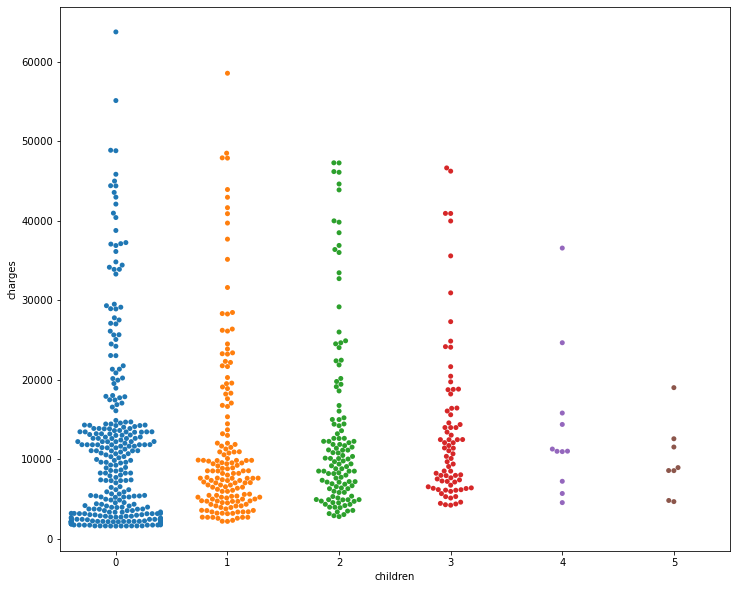

In [27]:
# Còpia de les dades de dones a un altre data
dones = data[data['is_male'] == 0].copy()

# Comparació del 'charges' respecte al nombre de fills
plt.figure(figsize=(12,10))
sns.swarmplot(y='charges',x='children',data=dones)
plt.show()

In [28]:
# S'aplica el T-test per analitzar com afecta el nombre de fills a les tasses
H0 = "el número de fills no afecta al preu de les tasses"   
H1 = "el número de fills afecta al preu de les tasses"   

z = dones[dones.children == 0]['charges']
u = dones[dones.children == 1]['charges']
d = dones[dones.children == 2]['charges']
t = dones[dones.children == 3]['charges']
q = dones[dones.children == 4]['charges']
c = dones[dones.children == 5]['charges']


# Aplicació test Anova per comparar múltiples mitjanes
f_stat, p_valor = stats.f_oneway(z,u,d,t,q,c)

if(p_valor<0.05):
    print(f'{p_valor} -> Es rebutja la hipòtesi nul·la, per tant {H1}')
else:
    print(f'{p_valor} -> No es rebutja la hipòtesi nul·la, per tant {H0}') 

0.4499972689876406 -> No es rebutja la hipòtesi nul·la, per tant el número de fills no afecta al preu de les tasses


### CORRELACIÓ ENTRE LES VARIABLES

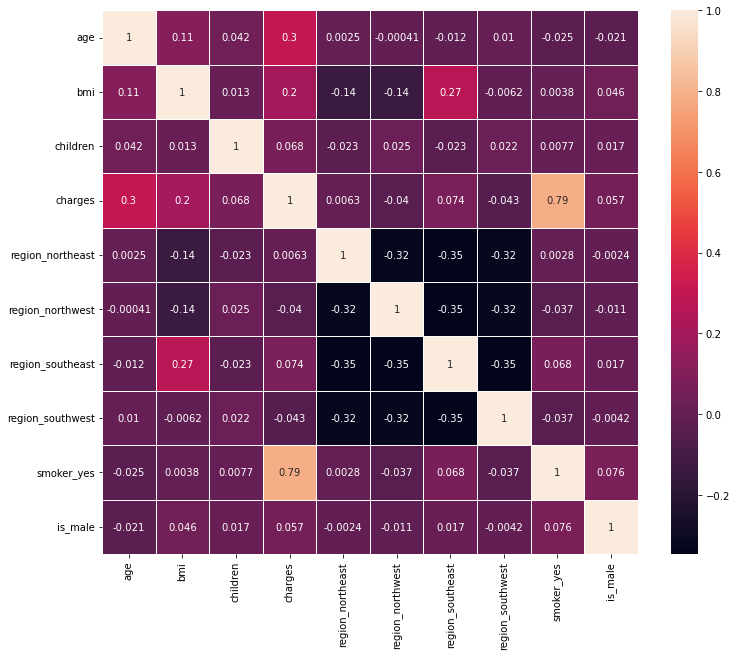

In [29]:
data_aux = data.drop(['charges_log'], axis=1)
correlacio = data_aux.corr()
plt.figure(figsize=(12,10))
ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

## 2. Primeres regresions

In [30]:
# Comencem partint el data en variable resposta i atributs
X = data.drop('charges', axis = 1)
X = X.drop('charges_log',axis = 1)
X = X.drop('region',axis = 1)

# Anteriorment auqetses dades han estat normalitzades així que no cal estandaritzr-les
Ylog = data['charges_log']
Y = data['charges']

In [31]:
# Separem les dades de train i test
X_train, X_test, Ylog_train, Ylog_test = train_test_split(X, Ylog, test_size=0.3, random_state=99)
_, _, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=99)

### REGRESSIONS SIMPLE

In [32]:
def RegressioSimple(atribut):
    lm = LinearRegression()
    np_data=X_train[atribut].to_numpy()
    x = np_data.reshape(-1,1)
    lm.fit(x,Ylog_train)

    m = np.linspace(X_train[atribut].min(), X_train[atribut].max(), 100)
    r = [lm.coef_ * i + lm.intercept_ for i in m]

    plt.figure()
    ax = plt.scatter(X_train[atribut],Ylog_train)
    plt.plot(m, r, 'r')
    
    pred = [lm.coef_ * i + lm.intercept_ for i in X_train[atribut]]
    pred = np.asarray(pred)
    Ylog_train2 = np.asarray(Ylog_train)

    MSE = ((Ylog_train2 - pred)**2).mean()
    r2 = r2_score(Ylog_train2, pred)

    print("Mean squeared error: ", MSE)
    print("R2 score: ", r2)

Mean squeared error:  1.5676633086308231
R2 score:  0.3167994919789908


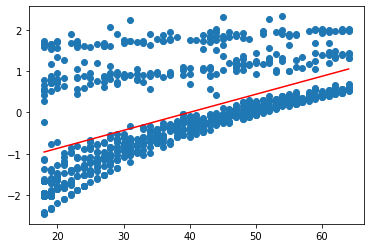

In [33]:
# agafem els atributs que hem vist més significants smoker_yes, age, bmi
RegressioSimple('age')

Mean squeared error:  1.206997191082163
R2 score:  0.013848623799965543


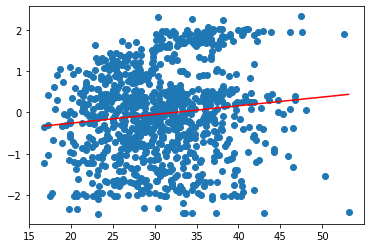

In [34]:
RegressioSimple('bmi')

Mean squeared error:  1.7187644219288352
R2 score:  0.4437207946163916


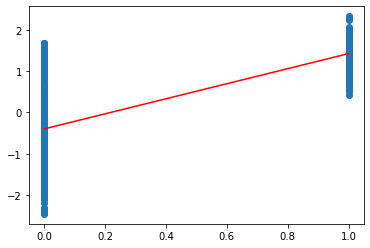

In [35]:
RegressioSimple('smoker_yes')

### REGRESSIONS MÚLTIPLES

In [36]:
regions = ['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']

def RegressioMultiple(regio,it = 0, X_train_aux = None, Y_train_aux = None):
    if (it == 0):
        X_train_aux = X_train[X_train[regio] == 1]
        Y_train_aux = Ylog_train[X_train[regio] == 1]
        for r in regions:
            if (regio != r):
                X_train_aux = X_train_aux.drop([r], axis=1)
    
    model = sm.OLS(Y_train_aux,X_train_aux)
    resultat = model.fit()
    if resultat.pvalues.max() > 0.05:
        resultat = BWSelection(it, regio, resultat, X_train_aux, Y_train_aux)
    return(resultat)

In [37]:
def BWSelection(it, regio, resultat, X_train_aux, Y_train_aux):
    it = it + 1
    index = list(resultat.pvalues).index(resultat.pvalues.max())
    X_train_aux = X_train_aux.drop(X_train_aux.columns[index], axis=1)
    res = RegressioMultiple(regio, it, X_train_aux, Y_train_aux)
    return(res)

In [38]:
model_ne = RegressioMultiple(regions[0])
model_nw = RegressioMultiple(regions[1])
model_se = RegressioMultiple(regions[2])
model_sw = RegressioMultiple(regions[3])

In [46]:
print(model_ne.summary())
print(model_nw.summary())
print(model_se.summary())
print(model_sw.summary())

                            OLS Regression Results                            
Dep. Variable:            charges_log   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     192.2
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           1.68e-68
Time:                        08:08:18   Log-Likelihood:                -135.09
No. Observations:                 212   AIC:                             280.2
Df Residuals:                     207   BIC:                             297.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.0391      0.002  

In [43]:
X_test_ne = X_test[X_test["region_northeast"] == 1]

X_test_ne = X_test_ne[["age","bmi","children","region_northeast","smoker_yes"]]
X_test_ne
#model_ne.summary()
prediccions = model_ne.predict(X_test_ne)
prediccions = list(prediccions.apply(float))
error_log = prediccions - Ylog_test[X_test["region_northeast"] == 1]
error_log = list(error_log.apply(float))

#prediccions

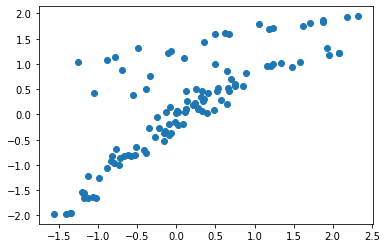

In [49]:
plt.scatter(prediccions,Ylog_test[X_test["region_northeast"] == 1]) 

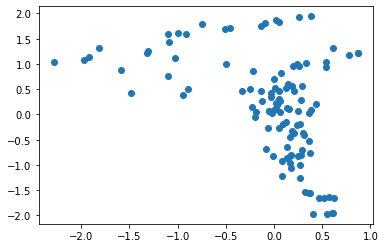

In [47]:
plt.scatter(error_log,Ylog_test[X_test["region_northeast"] == 1]) 

## 3. Descens del gradient